In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")
sns.set_context("paper", font_scale=1.1, rc={"lines.linewidth": 1.1})


def do_fft(time, data, f0, Fs):
    n = len(time)
    Y = np.fft.fft(data, axis=0)
    F = np.arange(n) * (Fs / n)
    return F, Y
    

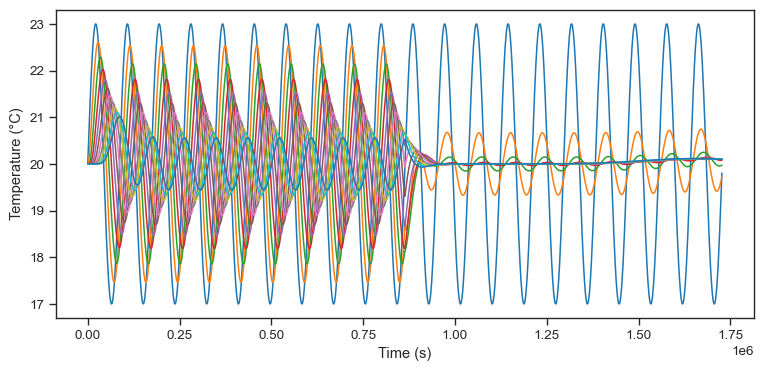

In [2]:
# Read data from CSV and convert to numpy array
tab = pd.read_csv('SimTempDat_StepUp_min1_1.csv').values

# First figure: Plotting data
plt.figure(figsize=(9, 4))
plt.plot(tab[:, 0], tab[:, 1:])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (°C)')
plt.savefig('Dtemp_StepUp_min1_1', dpi=300)
plt.show()

In [3]:
# Constants
T = 24 * 3600  # Total time period (24 hours converted to seconds)
Ts = 900       # Sampling time (15 minutes in seconds)
f0 = 1 / T
Fs = 1 / Ts

# Compute FFT
N = Fs / f0
P = len(tab[:, 0]) / N
F, Y = do_fft(tab[:, 0], tab[:, 1:], f0, Fs)

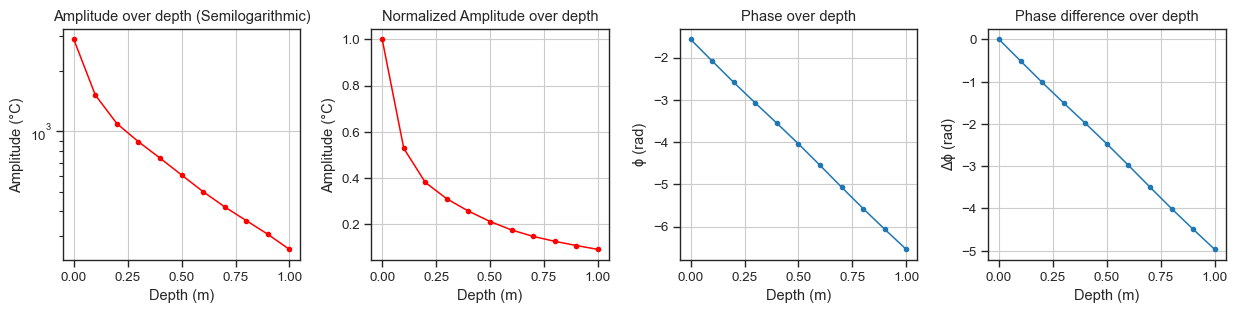

In [5]:
# Create a single figure with multiple subplots
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
fig.subplots_adjust(hspace=0.1, wspace=0.3)

# First subplot: Semilogarithmic Amplitude
depth_x = np.linspace(0, 1, 11)
semilog_y = np.abs(Y[int(P), :])
ax[0].semilogy(depth_x, semilog_y, marker='o', ms=3, color='r')
#ax[0,0].set_yscale("log", base=10)
ax[0].set_xlabel('Depth (m)')
ax[0].set_ylabel('Amplitude (°C)')
ax[0].set_title('Amplitude over depth (Semilogarithmic)')
ax[0].grid(True)

# Second subplot: Normalized Amplitude
normalized_y = np.abs(Y[int(P), :]) / np.abs(Y[int(P), 0])
ax[1].plot(depth_x, normalized_y, marker='o', ms=3, color='r')
ax[1].set_xlabel('Depth (m)')
ax[1].set_ylabel('Amplitude (°C)')
ax[1].set_title('Normalized Amplitude over depth')
ax[1].grid(True)

# Third subplot: Phase plot
phase_y = np.unwrap(np.angle(Y[int(P), :]))
ax[2].plot(depth_x, phase_y, marker='o', ms=3)
ax[2].set_xlabel('Depth (m)')
ax[2].set_ylabel('ϕ (rad)')
ax[2].set_title('Phase over depth')
ax[2].grid(True)

# Fourth subplot: Phase difference
relative_phase_y = np.unwrap(np.angle(Y[int(P), :])) - np.angle(Y[int(P), 0])
ax[3].plot(depth_x, relative_phase_y, marker='o', ms=3)
ax[3].set_xlabel('Depth (m)')
ax[3].set_ylabel('Δϕ (rad)')
ax[3].set_title('Phase difference over depth')
ax[3].grid(True)

plt.savefig('Dfig_SimTempDat_StepUp_min1_1', dpi=300)

# Display the figure with all subplots
plt.show()
